# Indian IPO Current Gains Prediction

This Notebook focuses on long term value of investment in IPO and predict whether the IPO will be profitable in years to come or not based on the various features. The data consists of the IPOs which came from 2010 till 2020. I have made prediction on what could be the price of each IPO at the start of 2021, also in the end I have determined the accuracy of the algorithm, that is how many times it gives correct prediction whether the IPO gain percentage will go up or down based on the Current Gains % target column.

In [1]:
#importing libraries
import pandas as pd
import numpy as np


C:\Users\PRATIK\Documents\ANACONDA\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PRATIK\Documents\ANACONDA\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\PRATIK\Documents\ANACONDA\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
ipo=pd.read_excel("IPO.xlsx")

In [3]:
ipo.head()

,Date,IPO Name,Profile,Issue Size,QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing,CMP,Current
0,NaT,NaN,NaN,(in crores),NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gains(%),NaN,Gains (%)
1,2021-01-01,Antony Waste,View,300.53,0.64,0.28,7.22,3.85,315.0,430.00,407.25,29.29,313.85,-0.37
2,2020-12-24,Bectors Food,View,540.54,176.85,620.86,29.33,198.02,288.0,501.00,595.55,106.79,409.70,42.26
3,2020-12-14,Burger King,View,796.5,86.64,354.11,68.15,156.65,60.0,115.35,138.40,130.67,141.60,136
4,2020-11-20,Gland,View,6479.55,6.40,0.51,0.24,2.06,1500.0,1710.00,1820.45,21.36,2205.15,47.01


#### Data Cleaning

In [4]:
ipo=ipo[1:]

In [5]:
ipo.head()

,Date,IPO Name,Profile,Issue Size,QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing,CMP,Current
1,2021-01-01,Antony Waste,View,300.53,0.64,0.28,7.22,3.85,315.0,430.00,407.25,29.29,313.85,-0.37
2,2020-12-24,Bectors Food,View,540.54,176.85,620.86,29.33,198.02,288.0,501.00,595.55,106.79,409.70,42.26
3,2020-12-14,Burger King,View,796.5,86.64,354.11,68.15,156.65,60.0,115.35,138.40,130.67,141.60,136
4,2020-11-20,Gland,View,6479.55,6.40,0.51,0.24,2.06,1500.0,1710.00,1820.45,21.36,2205.15,47.01
5,2020-11-02,Equitas Bank,View,517.6,3.91,0.22,2.08,1.95,33.0,31.00,32.75,-0.76,40.90,23.94


In [6]:
ipo.isnull().sum()

Date             0
IPO Name         0
Profile          0
Issue Size       0
QIB              0
HNI              0
RII              0
Total            0
Issue            0
Listing Open     0
Listing Close    0
Listing          0
CMP              0
Current          2
dtype: int64

In [7]:
ipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 1 to 237
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           237 non-null    datetime64[ns]
 1   IPO Name       237 non-null    object        
 2   Profile        237 non-null    object        
 3   Issue Size     237 non-null    object        
 4   QIB            237 non-null    float64       
 5   HNI            237 non-null    float64       
 6   RII            237 non-null    float64       
 7   Total          237 non-null    float64       
 8   Issue          237 non-null    float64       
 9   Listing Open   237 non-null    float64       
 10  Listing Close  237 non-null    float64       
 11  Listing        237 non-null    object        
 12  CMP            237 non-null    float64       
 13  Current        235 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 26.1+ KB


In [8]:
ipo=ipo.drop(['Profile'],axis=1)

In [9]:
ipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 1 to 237
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           237 non-null    datetime64[ns]
 1   IPO Name       237 non-null    object        
 2   Issue Size     237 non-null    object        
 3   QIB            237 non-null    float64       
 4   HNI            237 non-null    float64       
 5   RII            237 non-null    float64       
 6   Total          237 non-null    float64       
 7   Issue          237 non-null    float64       
 8   Listing Open   237 non-null    float64       
 9   Listing Close  237 non-null    float64       
 10  Listing        237 non-null    object        
 11  CMP            237 non-null    float64       
 12  Current        235 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 24.2+ KB


In [10]:
ipo.describe()

,QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,CMP
count,237.00000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,23.01865,69.561435,7.120464,25.899367,318.459916,381.981013,327.340844,477.369325
std,36.48863,139.464538,11.415000,46.693735,318.463558,477.337279,370.297752,1229.016653
min,0.00000,0.000000,0.000000,0.000000,0.000000,9.500000,1.570000,0.040000
25%,1.13000,1.210000,1.210000,1.570000,108.000000,115.000000,89.290000,19.000000
50%,4.66000,5.000000,3.170000,4.670000,207.000000,237.000000,191.250000,135.400000
75%,30.49000,62.130000,8.120000,33.380000,425.000000,500.000000,438.000000,409.700000
max,176.85000,958.070000,77.930000,277.280000,1766.000000,4900.250000,2892.800000,14679.400000


In [11]:
ipo.head()

,Date,IPO Name,Issue Size,QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing,CMP,Current
1,2021-01-01,Antony Waste,300.53,0.64,0.28,7.22,3.85,315.0,430.00,407.25,29.29,313.85,-0.37
2,2020-12-24,Bectors Food,540.54,176.85,620.86,29.33,198.02,288.0,501.00,595.55,106.79,409.70,42.26
3,2020-12-14,Burger King,796.5,86.64,354.11,68.15,156.65,60.0,115.35,138.40,130.67,141.60,136
4,2020-11-20,Gland,6479.55,6.40,0.51,0.24,2.06,1500.0,1710.00,1820.45,21.36,2205.15,47.01
5,2020-11-02,Equitas Bank,517.6,3.91,0.22,2.08,1.95,33.0,31.00,32.75,-0.76,40.90,23.94


In [12]:
ipo=ipo.dropna(axis=0)

In [13]:
ipo.head()

,Date,IPO Name,Issue Size,QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing,CMP,Current
1,2021-01-01,Antony Waste,300.53,0.64,0.28,7.22,3.85,315.0,430.00,407.25,29.29,313.85,-0.37
2,2020-12-24,Bectors Food,540.54,176.85,620.86,29.33,198.02,288.0,501.00,595.55,106.79,409.70,42.26
3,2020-12-14,Burger King,796.5,86.64,354.11,68.15,156.65,60.0,115.35,138.40,130.67,141.60,136
4,2020-11-20,Gland,6479.55,6.40,0.51,0.24,2.06,1500.0,1710.00,1820.45,21.36,2205.15,47.01
5,2020-11-02,Equitas Bank,517.6,3.91,0.22,2.08,1.95,33.0,31.00,32.75,-0.76,40.90,23.94


In [14]:
ipo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 237
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           235 non-null    datetime64[ns]
 1   IPO Name       235 non-null    object        
 2   Issue Size     235 non-null    object        
 3   QIB            235 non-null    float64       
 4   HNI            235 non-null    float64       
 5   RII            235 non-null    float64       
 6   Total          235 non-null    float64       
 7   Issue          235 non-null    float64       
 8   Listing Open   235 non-null    float64       
 9   Listing Close  235 non-null    float64       
 10  Listing        235 non-null    object        
 11  CMP            235 non-null    float64       
 12  Current        235 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 25.7+ KB


In [15]:
ipo.Listing.value_counts()

-5.00     2
 0.59     2
 23.19    2
 7.35     2
-13.67    1
         ..
 34.77    1
 3.27     1
-8.02     1
-10.49    1
-0.76     1
Name: Listing, Length: 231, dtype: int64

In [16]:
ipo['Listing']=ipo['Listing'].astype('float64')

In [17]:
ipo['Current']=ipo['Current'].astype('float64')

In [18]:
ipo.describe()

,QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing,CMP,Current
count,235.000000,235.000000,235.00000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,23.076468,69.668340,7.10966,25.939404,321.170213,383.767660,328.622255,1.824213,477.533532,16.584681
std,36.615061,139.955661,11.44112,46.854408,318.452006,478.920834,371.527423,45.852772,1234.015731,187.084415
min,0.000000,0.000000,0.00000,0.000000,10.000000,9.500000,1.570000,-97.150000,0.040000,-99.930000
25%,1.125000,1.255000,1.22000,1.570000,109.000000,115.175000,88.570000,-13.945000,18.250000,-88.645000
50%,4.660000,5.000000,3.17000,4.670000,210.000000,237.000000,191.250000,0.710000,131.800000,-33.980000
75%,29.410000,61.705000,8.06000,32.715000,426.500000,500.500000,441.450000,23.070000,408.100000,52.460000
max,176.850000,958.070000,77.93000,277.280000,1766.000000,4900.250000,2892.800000,153.500000,14679.400000,1805.830000


In [19]:
ipo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 237
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           235 non-null    datetime64[ns]
 1   IPO Name       235 non-null    object        
 2   Issue Size     235 non-null    object        
 3   QIB            235 non-null    float64       
 4   HNI            235 non-null    float64       
 5   RII            235 non-null    float64       
 6   Total          235 non-null    float64       
 7   Issue          235 non-null    float64       
 8   Listing Open   235 non-null    float64       
 9   Listing Close  235 non-null    float64       
 10  Listing        235 non-null    float64       
 11  CMP            235 non-null    float64       
 12  Current        235 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 25.7+ KB


In [20]:
ipo['Issue Size']=ipo['Issue Size'].astype('float64')

In [21]:
ipo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 237
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           235 non-null    datetime64[ns]
 1   IPO Name       235 non-null    object        
 2   Issue Size     235 non-null    float64       
 3   QIB            235 non-null    float64       
 4   HNI            235 non-null    float64       
 5   RII            235 non-null    float64       
 6   Total          235 non-null    float64       
 7   Issue          235 non-null    float64       
 8   Listing Open   235 non-null    float64       
 9   Listing Close  235 non-null    float64       
 10  Listing        235 non-null    float64       
 11  CMP            235 non-null    float64       
 12  Current        235 non-null    float64       
dtypes: datetime64[ns](1), float64(11), object(1)
memory usage: 25.7+ KB


In [22]:
ipo.corr()

,Issue Size,QIB,HNI,RII,Total,Issue,Listing Open,Listing Close,Listing,CMP,Current
Issue Size,1.000000,0.018203,-0.077482,-0.147723,-0.070540,0.303427,0.222284,0.255274,0.038158,0.088988,0.039705
QIB,0.018203,1.000000,0.792187,0.496792,0.810242,0.216701,0.261365,0.365791,0.429312,0.321028,0.331862
HNI,-0.077482,0.792187,1.000000,0.693124,0.948793,0.057523,0.133164,0.196700,0.467429,0.156595,0.178973
RII,-0.147723,0.496792,0.693124,1.000000,0.794916,-0.079766,-0.000619,0.024640,0.473438,0.017111,0.092698
Total,-0.070540,0.810242,0.948793,0.794916,1.000000,0.064327,0.139281,0.209868,0.529146,0.177764,0.218593
Issue,0.303427,0.216701,0.057523,-0.079766,0.064327,1.000000,0.788615,0.855322,0.010963,0.569800,0.173788
Listing Open,0.222284,0.261365,0.133164,-0.000619,0.139281,0.788615,1.000000,0.725842,0.080057,0.523055,0.186902
Listing Close,0.255274,0.365791,0.196700,0.024640,0.209868,0.855322,0.725842,1.000000,0.342004,0.736008,0.309153
Listing,0.038158,0.429312,0.467429,0.473438,0.529146,0.010963,0.080057,0.342004,1.000000,0.196748,0.244026
CMP,0.088988,0.321028,0.156595,0.017111,0.177764,0.569800,0.523055,0.736008,0.196748,1.000000,0.604783


#### Feature Selection

<AxesSubplot:>

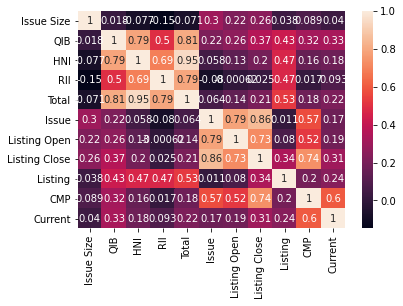

In [23]:
import seaborn as sns
%matplotlib inline

corr = ipo.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

In [24]:
ipo.columns

Index(['Date', 'IPO Name', 'Issue Size', 'QIB', 'HNI', 'RII', 'Total', 'Issue',
       'Listing Open', 'Listing Close', 'Listing', 'CMP', 'Current'],
      dtype='object')

In [25]:
ipo=ipo.drop(['Date','HNI'],axis=1)

In [26]:
ipo=ipo.drop(['Total'],axis=1)

In [27]:
ipo=ipo.drop(['Issue'],axis=1)

In [28]:
ipo=ipo.drop(['Listing Open'],axis=1)

In [29]:
ipo=ipo.drop(['CMP'],axis=1)

In [30]:
ipo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 237
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IPO Name       235 non-null    object 
 1   Issue Size     235 non-null    float64
 2   QIB            235 non-null    float64
 3   RII            235 non-null    float64
 4   Listing Close  235 non-null    float64
 5   Listing        235 non-null    float64
 6   Current        235 non-null    float64
dtypes: float64(6), object(1)
memory usage: 14.7+ KB


<AxesSubplot:>

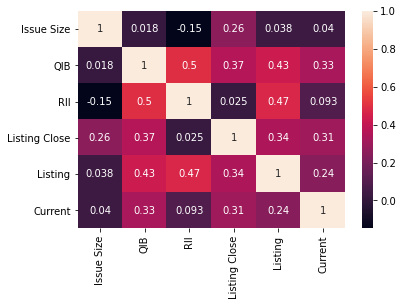

In [31]:
corr = ipo.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True)

#### Model Building

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
X=ipo.drop(['IPO Name','Current'],axis=1)
y=ipo['Current']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
preds=model.predict(X_test)
pow(pow(y_test-preds,2).mean(),0.5)

179.924886883389

In [34]:
from sklearn.ensemble import RandomForestRegressor
list1=[]
for i in range(1,100):
    X=ipo.drop(['IPO Name','Current'],axis=1)
    y=ipo['Current']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    model=RandomForestRegressor()
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    preds2=model.predict(X_train)
    rmse=pow(pow(y_test-preds,2).mean(),0.5)
    rmse2=pow(pow(y_train-preds2,2).mean(),0.5)
    if rmse2>rmse:
        list1.append((i,rmse,rmse2))

In [35]:
list1.sort(key=lambda x: x[1])

In [36]:
list1[:10]

[(68, 55.12438448174878, 72.36076466578847)]

In [37]:
list1=[]
for i in range(1,100):
    X=ipo.drop(['IPO Name','Current'],axis=1)
    y=ipo['Current']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    model=LinearRegression()
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    preds2=model.predict(X_train)
    rmse=pow(pow(y_test-preds,2).mean(),0.5)
    rmse2=pow(pow(y_train-preds2,2).mean(),0.5)
    if rmse2>rmse:
        list1.append((i,rmse,rmse2))
list1.sort(key=lambda x: x[0]+x[1])
list1[:10]

[(17, 83.70069310566919, 178.18732623949853),
 (10, 94.85566240848857, 177.56075924189832),
 (30, 75.91656961608128, 178.48900466969488),
 (28, 81.2472226702655, 178.3442314745189),
 (5, 106.17399027787526, 177.16998845164474),
 (13, 102.77714028668284, 177.11203239820205),
 (29, 88.92487591034521, 177.86794786456744),
 (1, 117.4997045287908, 176.03299281785232),
 (34, 84.89516564323111, 178.13383400272264),
 (9, 112.74722040552379, 176.54907753673365)]

In [38]:
from xgboost import XGBRegressor
list1=[]
for i in range(1,100):
    X=ipo.drop(['IPO Name','Current'],axis=1)
    y=ipo['Current']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    model=XGBRegressor()
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    preds2=model.predict(X_train)
    rmse=pow(pow(y_test-preds,2).mean(),0.5)
    rmse2=pow(pow(y_train-preds2,2).mean(),0.5)
    if rmse2>rmse:
        list1.append((i,rmse,rmse2))
list1.sort(key=lambda x: x[1])
list1[:10]

[]

In [39]:
from sklearn.svm import SVR
list1=[]
for i in range(1,100):
    X=ipo.drop(['IPO Name','Current'],axis=1)
    y=ipo['Current']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    model=SVR(C=1)
    model.fit(X_train,y_train)
    preds=model.predict(X_test)
    preds2=model.predict(X_train)
    rmse=pow(pow(y_test-preds,2).mean(),0.5)
    rmse2=pow(pow(y_train-preds2,2).mean(),0.5)
    if rmse2>rmse:
        list1.append((i,rmse,rmse2))
list1.sort(key=lambda x: x[1]+x[0])
list1[:10]

[(5, 48.66409086831198, 201.89675408979775),
 (17, 79.69392923393399, 202.00291399239734),
 (13, 83.71352902127937, 200.65135346445325),
 (29, 70.29380231815735, 200.8639684219174),
 (28, 72.34267204811701, 199.67276284455747),
 (10, 98.79165249229422, 201.1106941655166),
 (8, 109.62046487280779, 199.17849333400468),
 (30, 88.7000811832337, 200.39121776735522),
 (53, 67.03850236675643, 200.41421408972414),
 (34, 91.38218943243164, 202.18833373975403)]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=68)
model=RandomForestRegressor()
model.fit(X_train,y_train)
preds=model.predict(X)
rmse=pow(pow(y-preds,2).mean(),0.5)
rmse

70.05463714905548

#### Deployment

In [41]:
df1=pd.DataFrame(preds)

In [42]:
df2=pd.DataFrame(y)

In [43]:
df1=df1.reset_index()

In [44]:
df2=df2.reset_index()

In [45]:
df3=pd.concat([df1,df2],axis=1)

In [46]:
df3.to_excel("IPO_2.xlsx")

#### Calculating how many times algorithm predicts whether the gains will be positive or negative

In [47]:
sum(df3[0]*df3['Current']>0)

206

In [49]:
206/235

0.8765957446808511

My algorithm predicts correct gains (positive or negative ) 87.7% of the times